## You're here! 
Welcome to your first competition in the [ITI's AI Pro training program](https://ai.iti.gov.eg/epita/ai-engineer/)! We hope you enjoy and learn as much as we did prepairing this competition.


## Introduction

In the competition, it's required to predict the `Severity` of a car crash given info about the crash, e.g., location.

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

Feel free to `Fork` this notebook and share it with your modifications **OR** use it to create your submissions.

### Prerequisites
You should know how to use python and a little bit of Machine Learning. You can apply the techniques you learned in the training program and submit the new solutions! 

### Checklist
You can participate in this competition the way you perefer. However, I recommend following these steps if this is your first time joining a competition on Kaggle.

* Fork this notebook and run the cells in order.
* Submit this solution.
* Make changes to the data processing step as you see fit.
* Submit the new solutions.

*You can submit up to 5 submissions per day. You can select only one of the submission you make to be considered in the final ranking.*


Don't hesitate to leave a comment or contact me if you have any question!

## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [2]:
import pandas as pd

## Exploratory Data Analysis
In this step, one should load the data and analyze it. However, I'll load the data and do minimal analysis. You are encouraged to do thorough analysis!

Let's load the data using `pandas` and have a look at the generated `DataFrame`.

In [3]:
df = pd.read_csv('train.csv')

print("The shape of the dataset is {}.\n\n".format(df.shape))

df.tail()

#np.sum(df['Give_Way'])

The shape of the dataset is (6407, 16).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
6402,6402,37.740630,-122.407930,False,0.368,False,False,False,False,False,False,False,False,R,3,2017-10-01 18:36:13
6403,6403,37.752755,-122.402790,False,0.639,False,False,True,False,False,False,False,False,R,2,2018-10-23 07:40:27
6404,6404,37.726304,-122.446015,False,0.000,False,False,True,False,False,False,False,False,R,2,2019-10-28 15:45:00
6405,6405,37.808090,-122.367211,False,0.000,False,False,True,False,False,False,False,False,R,3,2019-05-04 13:45:31
6406,6406,37.773745,-122.408515,False,0.000,True,False,False,False,False,False,False,False,R,2,2020-02-28 19:43:00


### convert holidays.xml to csv

In [5]:
# Importing the required libraries
import xml.etree.ElementTree as Xet
import pandas as pd
  
rows = []
  
# Parsing the XML file
xmlparse = Xet.parse('holidays.xml')
root = xmlparse.getroot()
for i in root:
    rows.append({"holiday_name": i.find("description").text, "date": i.find("date").text})
    
df_holidays = pd.DataFrame(rows)

In [7]:
# convert timestamp column to a date object
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# convert date column to date object 
df_holidays['date'] = pd.to_datetime(df_holidays['date']).dt.date

# read weather csv file
df_weather = pd.read_csv('weather-sfcsv.csv')

# merge Year, Month and Day columns into date object column
df_weather['date']=pd.to_datetime(df_weather[["Year", "Month", "Day"]])
df_weather['date'] = pd.to_datetime(df_weather['date']).dt.date
print(df_weather.shape)
df_weather.drop(['Precipitation(in)', 'Humidity(%)',  'Weather_Condition', 'Wind_Chill(F)', 'Selected', 'Hour'], axis=1, inplace=True)
df_weather = df_weather.groupby('date', as_index=False)['Year', 'Day', 'Month', 'Wind_Speed(mph)', 'Visibility(mi)', 'Temperature(F)'].mean()
df_weather.columns
print(df_weather.shape)
df_weather

(6901, 13)
(1592, 7)


/var/folders/4g/xybm8dd91pg7cjxkwg1lqh5m0000gn/T/ipykernel_1740/42709876.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_weather = df_weather.groupby('date', as_index=False)['Year', 'Day', 'Month', 'Wind_Speed(mph)', 'Visibility(mi)', 'Temperature(F)'].mean()


,date,Year,Day,Month,Wind_Speed(mph),Visibility(mi),Temperature(F)
0,2016-03-23,2016.0,23.0,3.0,16.700000,10.000000,57.725000
1,2016-03-24,2016.0,24.0,3.0,11.760000,10.000000,57.180000
2,2016-03-25,2016.0,25.0,3.0,18.033333,10.000000,64.966667
3,2016-03-26,2016.0,26.0,3.0,3.500000,10.000000,52.000000
4,2016-03-27,2016.0,27.0,3.0,22.666667,10.000000,55.366667
...,...,...,...,...,...,...,...
1587,2020-12-27,2020.0,27.0,12.0,0.000000,10.000000,49.000000
1588,2020-12-28,2020.0,28.0,12.0,7.428571,9.571429,52.285714
1589,2020-12-29,2020.0,29.0,12.0,4.333333,10.000000,47.166667
1590,2020-12-30,2020.0,30.0,12.0,6.066667,9.466667,50.000000


In [8]:
# merge holidays data with train data
df = pd.merge(df,df_holidays,on='date',how='left')

# merge holidays data with train data
df = pd.merge(df,df_weather,on='date',how='left')

# replace holidays names with true and false 
df['holiday_name'].fillna(False,inplace=True)
x = set(df_holidays['holiday_name'])
df['holiday_name'].replace(x,True,inplace=True)

#replace wind_speed nan values with it's average
print(df.isna().sum())
df.fillna(df.mean(), inplace = True)

ID                  0
Lat                 0
Lng                 0
Bump                0
Distance(mi)        0
Crossing            0
Give_Way            0
Junction            0
No_Exit             0
Railway             0
Roundabout          0
Stop                0
Amenity             0
Side                0
Severity            0
timestamp           0
date                0
holiday_name        0
Year                0
Day                 0
Month               0
Wind_Speed(mph)    29
Visibility(mi)      0
Temperature(F)      1
dtype: int64


/var/folders/4g/xybm8dd91pg7cjxkwg1lqh5m0000gn/T/ipykernel_1740/3686432230.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [9]:
df = df.drop(['ID', 'Bump', 'No_Exit', 'date', 'timestamp'], axis=1)

In [10]:
df.columns

Index(['Lat', 'Lng', 'Distance(mi)', 'Crossing', 'Give_Way', 'Junction',
       'Railway', 'Roundabout', 'Stop', 'Amenity', 'Side', 'Severity',
       'holiday_name', 'Year', 'Day', 'Month', 'Wind_Speed(mph)',
       'Visibility(mi)', 'Temperature(F)'],
      dtype='object')

In [11]:
print(df.isna().sum())
print(df.isnull().sum())

Lat                0
Lng                0
Distance(mi)       0
Crossing           0
Give_Way           0
Junction           0
Railway            0
Roundabout         0
Stop               0
Amenity            0
Side               0
Severity           0
holiday_name       0
Year               0
Day                0
Month              0
Wind_Speed(mph)    0
Visibility(mi)     0
Temperature(F)     0
dtype: int64
Lat                0
Lng                0
Distance(mi)       0
Crossing           0
Give_Way           0
Junction           0
Railway            0
Roundabout         0
Stop               0
Amenity            0
Side               0
Severity           0
holiday_name       0
Year               0
Day                0
Month              0
Wind_Speed(mph)    0
Visibility(mi)     0
Temperature(F)     0
dtype: int64


19


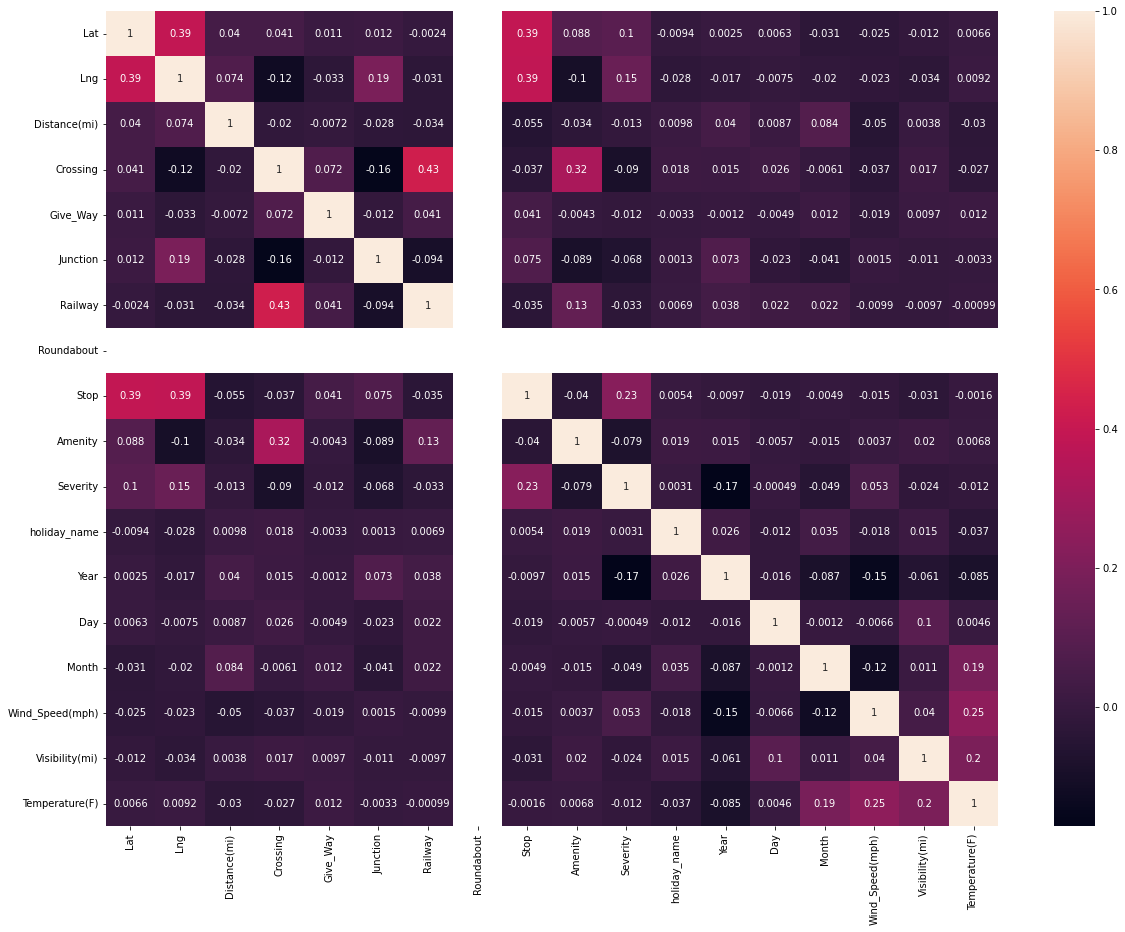

In [12]:
# Corr Heat map
import seaborn as sns

import matplotlib.pyplot as plt
print(len(df.columns))

correlation_mat = df.corr()

plt.figure(figsize=(20,15))
ax=plt.subplot(111)

sns.heatmap(correlation_mat, annot = True, ax=ax)

plt.show()

We've got 6407 examples in the dataset with 14 featues, 1 ID, and the `Severity` of the crash.

By looking at the features and a sample from the data, the features look of numerical and catogerical types. What about some descriptive statistics?

### Get dummy variables of each categorical column

In [13]:
df = pd.get_dummies(df, prefix=['Side'], columns=['Side'])
df = df.drop(['Side_L'], axis=1)

# Mean_encoded_subject = df.groupby(['Side'])['Severity'].mean().to_dict()
# df['Side'] =  df['Side'].map(Mean_encoded_subject)

19


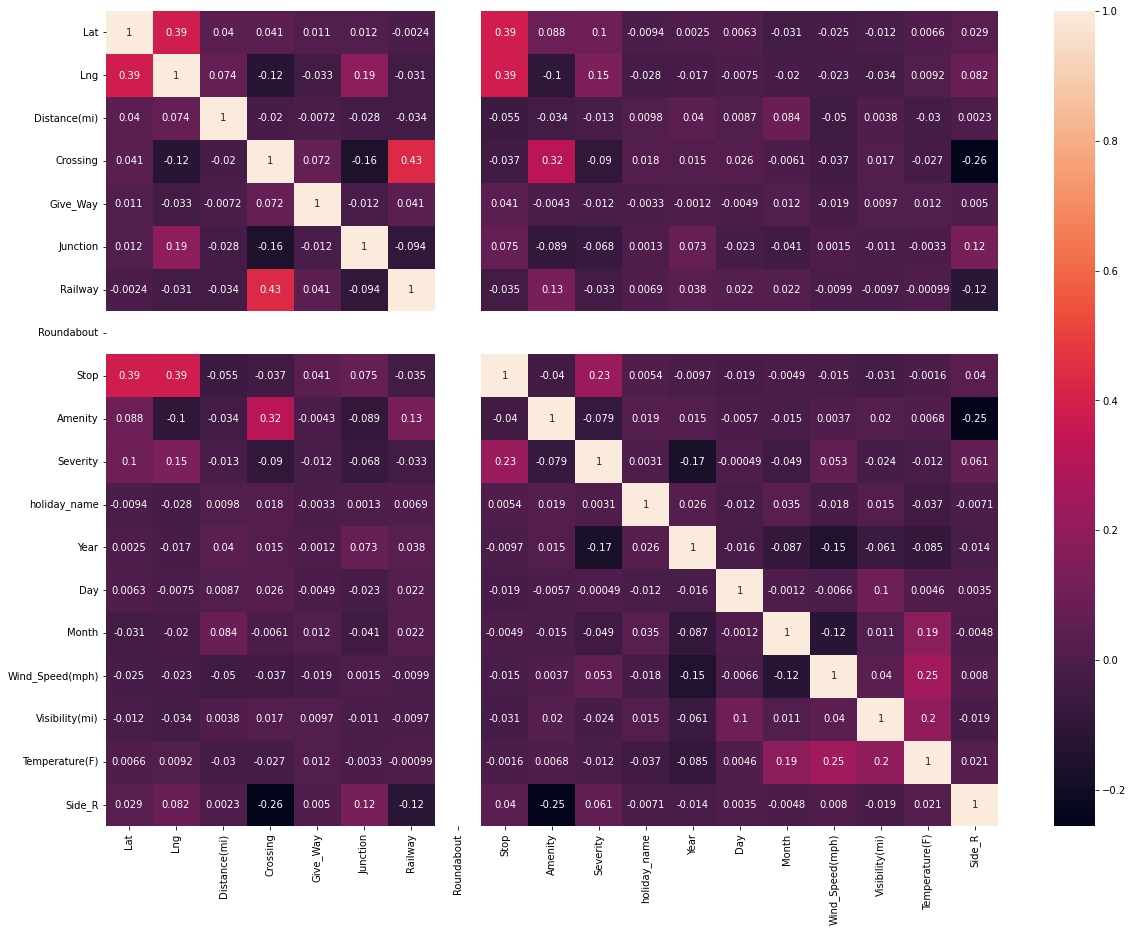

In [14]:
# Corr Heat map
import seaborn as sns

import matplotlib.pyplot as plt
print(len(df.columns))

correlation_mat = df.corr()

plt.figure(figsize=(20,15))
ax=plt.subplot(111)

sns.heatmap(correlation_mat, annot = True, ax=ax)

plt.show()

In [15]:
# scatter plot for lat and lng in terms of severity
import matplotlib.pyplot as plt
import numpy as np

print(df.columns)
print(df.shape)

Index(['Lat', 'Lng', 'Distance(mi)', 'Crossing', 'Give_Way', 'Junction',
       'Railway', 'Roundabout', 'Stop', 'Amenity', 'Severity', 'holiday_name',
       'Year', 'Day', 'Month', 'Wind_Speed(mph)', 'Visibility(mi)',
       'Temperature(F)', 'Side_R'],
      dtype='object')
(6407, 19)


The output shows desciptive statistics for the numerical features, `Lat`, `Lng`, `Distance(mi)`, and `Severity`. I'll use the numerical features to demonstrate how to train the model and make submissions. **However you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.**

In [16]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df['Distance(mi)'] = scaler.fit_transform(df['Distance(mi)'].to_numpy().reshape(-1,1))
# df['Temperature(F)'] = scaler.fit_transform(df['Temperature(F)'].to_numpy().reshape(-1,1))
# df['Visibility(mi)'] = scaler.fit_transform(df['Visibility(mi)'].to_numpy().reshape(-1,1))
# df['Wind_Speed(mph)'] = scaler.fit_transform(df['Wind_Speed(mph)'].to_numpy().reshape(-1,1))
# df['Lat'] = scaler.fit_transform(df['Lat'].to_numpy().reshape(-1,1))
# df['Lng'] = scaler.fit_transform(df['Lng'].to_numpy().reshape(-1,1))

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 

*Note: a good way to generate reproducible results is to set the seed to the algorithms that depends on randomization. This is done with the argument `random_state` in the following command* 

In [17]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Severity']) # Try adding `stratify` here

X_train = train_df.drop(columns=['Severity'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['Severity'])
y_val = val_df['Severity']


As pointed out eariler, I'll use the numerical features to train the classifier. **However, you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.** 

## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)

Now let's test our classifier on the validation dataset and see the accuracy.

In [19]:
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7464898595943837


Well. That's a good start, right? A classifier that predicts all examples' `Severity` as 2 will get around 0.63. You should get better score as you add more features and do better data preprocessing.

## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [21]:
test_df = pd.read_csv('test.csv')
test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
0,6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31
1,6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00
2,6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45
3,6410,37.761818,-122.405869,False,0.000,False,False,True,False,False,False,False,False,R,2019-08-06 15:46:25
4,6411,37.732350,-122.414100,False,0.670,False,False,False,False,False,False,False,False,R,2018-10-17 09:54:58


Note that the test set has the same features and doesn't have the `Severity` column.
At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

Now we'll add `Severity` column to the test `DataFrame` and add the values of the predicted class to it.

**I'll select the numerical features here as I did in the training set. DO NOT forget to change this step as you change the preprocessing of the training data.**

In [22]:
import matplotlib.pyplot as plt

# convert timestamp column to a date object
test_df['date'] = pd.to_datetime(test_df['timestamp']).dt.date

# merge holidays data with train data
test_df = pd.merge(test_df,df_holidays,on='date',how='left')

# merge holidays data with train data
test_df = pd.merge(test_df,df_weather,on='date',how='left')

# replace holidays names with true and false 
test_df['holiday_name'].fillna(False,inplace=True)
x = set(df_holidays['holiday_name'])
test_df['holiday_name'].replace(x,True,inplace=True)

ID = test_df['ID']
test_df = test_df.drop(['ID', 'Bump', 'No_Exit', 'date', 'timestamp'], axis=1)

test_df = pd.get_dummies(test_df, prefix=['Side'], columns=['Side'])
test_df = test_df.drop(['Side_L'], axis=1)

#replace wind_speed nan values with it's average
print(test_df.isna().sum())
test_df.fillna(test_df.mean(), inplace = True)

y_test_predicted = classifier.predict(test_df)

test_df['Severity'] = y_test_predicted
test_df['ID'] = ID

test_df.head()

Lat                 0
Lng                 0
Distance(mi)        0
Crossing            0
Give_Way            0
Junction            0
Railway             0
Roundabout          0
Stop                0
Amenity             0
holiday_name        0
Year                0
Day                 0
Month               0
Wind_Speed(mph)    10
Visibility(mi)      0
Temperature(F)      0
Side_R              0
dtype: int64


,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,Railway,Roundabout,Stop,Amenity,holiday_name,Year,Day,Month,Wind_Speed(mph),Visibility(mi),Temperature(F),Side_R,Severity,ID
0,37.786060,-122.390900,0.039,False,False,True,False,False,False,False,False,2016.0,4.0,4.0,12.950000,10.000000,62.000000,1,2,6407
1,37.769609,-122.415057,0.202,False,False,False,False,False,False,False,False,2020.0,28.0,10.0,6.200000,9.800000,60.800000,1,2,6408
2,37.807495,-122.476021,0.000,False,False,False,False,False,False,False,False,2019.0,9.0,9.0,16.857143,9.428571,66.857143,1,2,6409
3,37.761818,-122.405869,0.000,False,False,True,False,False,False,False,False,2019.0,6.0,8.0,13.000000,10.000000,67.333333,1,2,6410
4,37.732350,-122.414100,0.670,False,False,False,False,False,False,False,False,2018.0,17.0,10.0,8.466667,9.333333,54.366667,1,2,6411


Now we're ready to generate the submission file. The submission file needs the columns `ID` and `Severity` only.

In [24]:
# test_df[['ID', 'Severity']].to_csv('/kaggle/working/submission.csv', index=False)

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Scroll down until you see the output files then select the `submission.csv` file and click `Submit`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

## Conclusion

In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and the submission process. We chose not to go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and use it to create your submission.